In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
data=pd.read_csv('Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [19]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [21]:
data.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

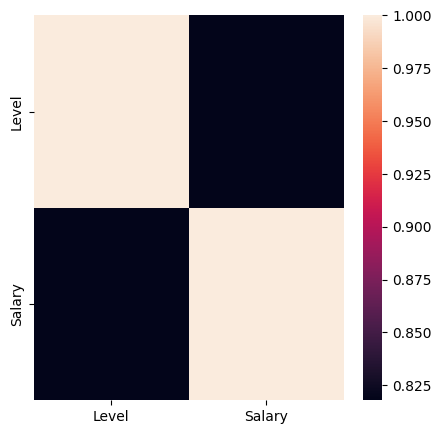

In [22]:
heat_map=data.drop(columns='Position')

plt.figure(figsize=(5,5))
sns.heatmap(heat_map.corr())
plt.show()

In [23]:
X=data['Level']
Y=data['Salary']

In [24]:
X=data.iloc[:, 1:2].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [25]:
Y=data.iloc[:, 2].values
Y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

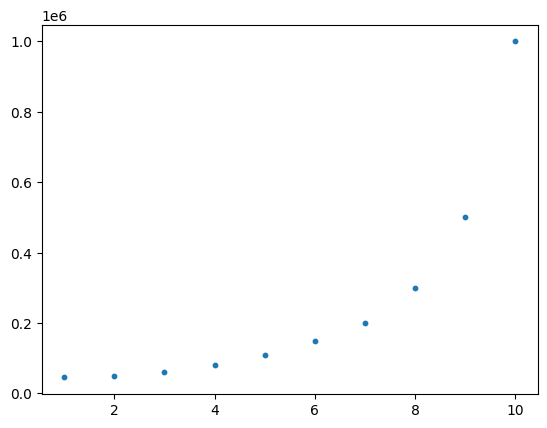

In [26]:
plt.scatter(X,Y, s=10)
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X)


poly.fit(X_poly, Y)

lin_poly=LinearRegression()
lin_poly.fit(X_poly, Y)

LinearRegression()

In [28]:
rmse = np.sqrt(mean_squared_error(Y,lin_poly.predict(poly.fit_transform(X))))
r2 = r2_score(Y,lin_poly.predict(poly.fit_transform(X)))
print(rmse)
print(r2)

82212.12400451244
0.9162082221443943


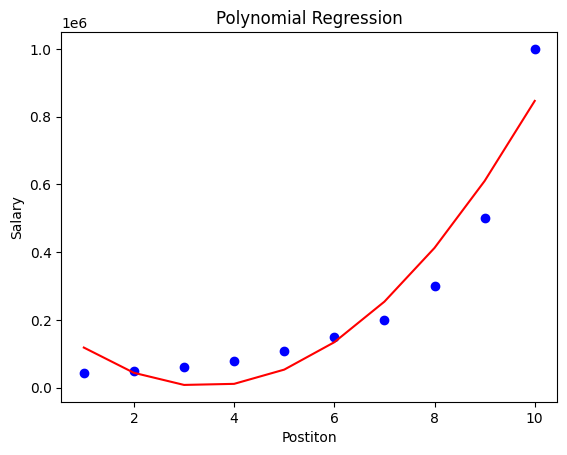

In [30]:
plt.scatter(X, Y, color = 'blue') 

plt.plot(X, lin_poly.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Postiton') 
plt.ylabel('Salary') 

plt.show() 

In [31]:
lin_poly.predict(poly.fit_transform([[11.0]]))[0]

1121833.3333333326